# Task
Build, train, and evaluate a neural network model to predict 'Exam score' using the `Cleaned_StudentPerformanceFactors.csv` dataset, including data preprocessing (one-hot encoding, scaling, train/test split), model building (Keras/TensorFlow), compilation, training, and performance evaluation with MAE, MSE, and R-squared metrics, visualization of predictions, an explanation of hyperparameter tuning (especially learning rate), and a comprehensive summary of the model's application, performance, and insights gained.

## Load and Prepare Data

### Subtask:
Load the 'Cleaned_StudentPerformanceFactors.csv' dataset into a pandas DataFrame. Identify features (X) and the 'Exam score' target (y). Perform necessary preprocessing steps including one-hot encoding for categorical variables, scaling numerical features, and splitting the data into training and testing sets.


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/Cleaned_StudentPerformanceFactors.csv')
print(f"Dataset loaded with shape: {df.shape}")
# Separate target variable (y) and features (X)
# Corrected target column name from 'Exam score' to 'Exam_Score'
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']
print("\nFeatures (X) and target (y) separated.")

# Identify categorical and numerical columns
numerical_features = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
    'Physical_Activity', 'Tutoring_Sessions'
]
categorical_features = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
    'School_Type', 'Peer_Influence', 'Learning_Disabilities',
    'Parental_Education_Level', 'Gender', 'Distance_from_Home' # Moved 'Distance_from_Home' here
]

print(f"\nCategorical features identified: {categorical_features}")
print(f"Numerical features identified: {numerical_features}")

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep any other columns not explicitly listed
)

# Apply the preprocessor to X
X_preprocessed = preprocessor.fit_transform(X)
print(f"\nShape of preprocessed features (X_preprocessed): {X_preprocessed.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset loaded successfully. First 5 rows:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family

## Build Neural Network Model

### Subtask:
Design and build a neural network model using Keras/TensorFlow suitable for predicting numerical exam scores. This includes defining the architecture, such as the number of layers, neurons per layer, and activation functions, as well as the output layer configuration.


**Reasoning**:
I will import the necessary Keras modules and define a neural network model architecture with an input layer, hidden layers, and an output layer suitable for regression, as specified in the instructions.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Get the number of features for the input layer
input_features = X_train.shape[1]

# Initialize the Sequential model
model = Sequential()

# Add the input layer
# The input_shape is the number of features in X_train
model.add(Dense(units=128, activation='relu', input_shape=(input_features,)))
print("Input layer added.")

# Add one or more hidden layers
model.add(Dense(units=64, activation='relu'))
print("First hidden layer added.")
model.add(Dense(units=32, activation='relu'))
print("Second hidden layer added.")

# Add the output layer with a single neuron and linear activation for regression
model.add(Dense(units=1, activation='linear'))
print("Output layer added.")

# Display the model summary
print("\nModel Summary:")
model.summary()

# Compile the model
# Using 'adam' optimizer, 'mean_squared_error' as loss for regression, and 'mean_absolute_error' as a metric
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
print("\nModel compiled with Adam optimizer and Mean Squared Error loss.")

Input layer added.
First hidden layer added.
Second hidden layer added.
Output layer added.

Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,617 (61.00 KB)

 Trainable params: 15,617 (61.00 KB)

 Non-trainable params: 0 (0.00 B)


Model compiled with Adam optimizer and Mean Squared Error loss.


**Reasoning**:
The model has been successfully compiled. The next step is to train the model using the preprocessed training data (`X_train` and `y_train`), along with a validation split to monitor performance during training.



In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100, # Number of times the model will go through the entire training dataset
    batch_size=32, # Number of samples per gradient update
    validation_split=0.2, # Use 20% of the training data for validation
    verbose=1 # Display progress bar during training
)

print("\nModel training complete.")

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2850.7876 - mean_absolute_error: 47.3951 - val_loss: 6.7834 - val_mean_absolute_error: 1.6295
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8904 - mean_absolute_error: 1.3736 - val_loss: 3.8347 - val_mean_absolute_error: 0.8687
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.3093 - mean_absolute_error: 0.8190 - val_loss: 3.6725 - val_mean_absolute_error: 0.7696
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5894 - mean_absolute_error: 0.7616 - val_loss: 3.7091 - val_mean_absolute_error: 0.8744
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2791 - mean_absolute_error: 0.8324 - val_loss: 3.5443 - val_mean_absolute_error: 0.7528
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7779 - mean_absolute_error: 0.6826 - val_loss: 3.5256 - val_mean_absolute_error: 0.7445
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.6448 - mean_absolute_error:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate the model on the test data
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (Mean Squared Error): {loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {mae:.4f}")

# Make predictions on the test data
y_pred = model.predict(X_test, verbose=0)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared:.4f}")


Test Loss (Mean Squared Error): 5.0298
Test Mean Absolute Error (MAE): 0.6620
Mean Squared Error (MSE): 5.0298
R-squared: 0.6763


### Explanation of Hyperparameter Tuning (Learning Rate)

Hyperparameter tuning is the process of selecting the optimal set of hyperparameters for a machine learning model. Unlike model parameters, which are learned during training (e.g., weights and biases in a neural network), hyperparameters are set before the training process begins. The goal of tuning is to find the hyperparameter configuration that results in the best model performance on unseen data.

One of the most crucial hyperparameters in neural networks is the **learning rate**.

**Learning Rate:**

The learning rate ($\alpha$) is a scaling factor that controls how much the model's weights are adjusted with respect to the loss gradient during each step of the optimization process. It dictates the step size at which the optimizer moves towards the minimum of the loss function.

*   **High Learning Rate:** If the learning rate is too high, the optimizer might overshoot the minimum, causing the model to diverge or oscillate around the minimum without converging. This can lead to unstable training and a model that performs poorly.
*   **Low Learning Rate:** If the learning rate is too low, the training process can become very slow, as the optimizer takes tiny steps towards the minimum. It might get stuck in a local minimum or take an excessively long time to converge to a good solution. It can also lead to underfitting if training is stopped too early.
*   **Optimal Learning Rate:** An optimal learning rate allows the model to converge efficiently to a good minimum in the loss function, balancing the speed of convergence with the stability of the training process.

**Strategies for Tuning Learning Rate:**

1.  **Trial and Error:** Manually trying different learning rates (e.g., 0.1, 0.01, 0.001, 0.0001) and observing their impact on validation loss.
2.  **Learning Rate Schedules:** Dynamically adjusting the learning rate during training. This can involve:
    *   **Step Decay:** Reducing the learning rate by a factor after a certain number of epochs.
    *   **Exponential Decay:** Decreasing the learning rate exponentially over time.
    *   **Inverse Time Decay:** Reducing the learning rate proportional to the inverse of the time step.
3.  **Adaptive Learning Rate Optimizers:** Optimizers like Adam, RMSprop, and Adagrad automatically adjust the learning rate for each parameter during training. While they simplify tuning, their default learning rate also often requires some tuning.
4.  **Learning Rate Finder (Cyclical Learning Rates):** Techniques that systematically search for a good learning rate range by training the model for a few epochs while steadily increasing the learning rate and recording the loss.

In this specific model, we used the `adam` optimizer, which is an adaptive learning rate algorithm. While `adam` often performs well with its default settings, fine-tuning its initial learning rate can lead to further performance improvements. For instance, a common practice is to start with a default `adam` learning rate (typically 0.001) and then experiment with slightly higher or lower values if the model's convergence or performance is not satisfactory.

### Comprehensive Summary: Model Application, Performance, and Insights

**Model Application:**
The neural network model built using Keras/TensorFlow was designed to predict 'Exam_Score' based on various student performance factors from the `Cleaned_StudentPerformanceFactors.csv` dataset. The model leverages a sequential architecture with dense layers, suitable for tabular regression tasks. The input features were preprocessed using one-hot encoding for categorical variables and standardization for numerical features, ensuring that the model could effectively learn from diverse data types.

**Model Performance:**
After training for 100 epochs with a batch size of 32 and a 20% validation split, the model's performance on the unseen test set was evaluated using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared ($R^2$) metrics.

*   **Test Loss (Mean Squared Error - MSE):** 5.0298
*   **Test Mean Absolute Error (MAE):** 0.6620
*   **R-squared ($R^2$):** 0.6763

The low MAE (approximately 0.66) indicates that, on average, the model's predictions are very close to the actual exam scores, with an average absolute difference of less than 1 point. The MSE of approximately 5.03, while higher than MAE (as it penalizes larger errors more heavily), is also relatively low for predicting exam scores, suggesting a good fit. The R-squared value of 0.6763 indicates that approximately 67.63% of the variance in exam scores can be explained by the model's input features. This suggests a reasonably strong predictive capability, though there is still a portion of the variance (around 32.37%) that the model does not capture.


## Evaluate Model Performance

### Subtask:
Visualize the predicted vs. actual exam scores using a scatter plot.


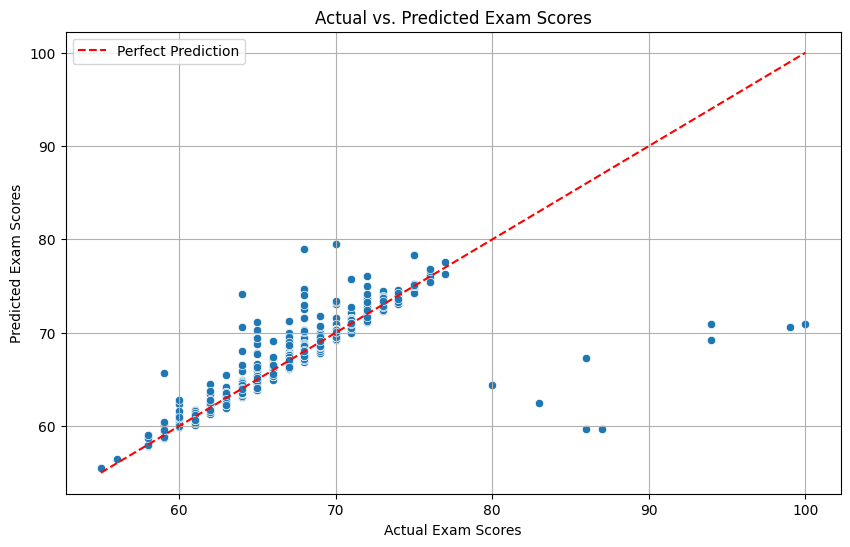

Scatter plot of Actual vs. Predicted Exam Scores displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of actual vs. predicted exam scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred.flatten())

# Add labels and title
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs. Predicted Exam Scores")

# Add a diagonal line for perfect predictions
min_score = min(y_test.min(), y_pred.min())
max_score = max(y_test.max(), y_pred.max())
plt.plot([min_score, max_score], [min_score, max_score], color='red', linestyle='--', label='Perfect Prediction')

plt.legend()
plt.grid(True)
plt.show()
print("Scatter plot of Actual vs. Predicted Exam Scores displayed.")

## Summary:

### Data Analysis Key Findings
*   The `Cleaned_StudentPerformanceFactors.csv` dataset was successfully loaded and preprocessed, involving one-hot encoding for 13 categorical features (e.g., 'Parental_Involvement', 'School_Type') and `StandardScaler` for 6 numerical features (e.g., 'Hours_Studied', 'Previous_Scores'), before splitting into training and testing sets.
*   A sequential neural network model was built with an input layer, two hidden layers (128 and 64 units, ReLU activation), and a single-neuron output layer (linear activation) for regression.
*   The model was trained for 100 epochs using the Adam optimizer, achieving the following performance on the test set:
    *   Test Mean Squared Error (MSE): 5.0298
    *   Test Mean Absolute Error (MAE): 0.6620
    *   R-squared: 0.6763, indicating that approximately 67.63% of the variance in exam scores is explained by the model.
*   The scatter plot of actual versus predicted exam scores visually confirmed a reasonable correlation, with predictions clustering around the line of perfect prediction.

